# Visualization   
   
Plots to anwer questions.

In [304]:
# import useful modules
import pymysql
import numpy as np
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine

import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter

## Connecting mysql

In [20]:
## connecting mysql
my_db = mysql.connector.connect(host="localhost", user='root',password='Wzy410179',db='db_consumer_panel',
                                ssl_disabled = True )
mycursor = my_db.cursor()

## a.ii. Plot the distribution of products per module and products per category

In [89]:
## getting data of total number of products per department from mysql database with sql qurey
sql_query = "SELECT department_at_prod_id AS department, COUNT(prod_id) AS total_prod_per_department FROM dta_at_prod_id WHERE department_at_prod_id IS NOT NULL GROUP BY department_at_prod_id ORDER BY total_prod_per_department DESC;"

prod_per_dpt = pd.read_sql(sql_query, con = my_db)
prod_per_dpt.head()

,department,total_prod_per_department
0,DRY GROCERY,1188033
1,GENERAL MERCHANDISE,1145425
2,HEALTH & BEAUTY CARE,716162
3,NON-FOOD GROCERY,515654
4,FROZEN FOODS,192659


### Total Number of Products Per Department

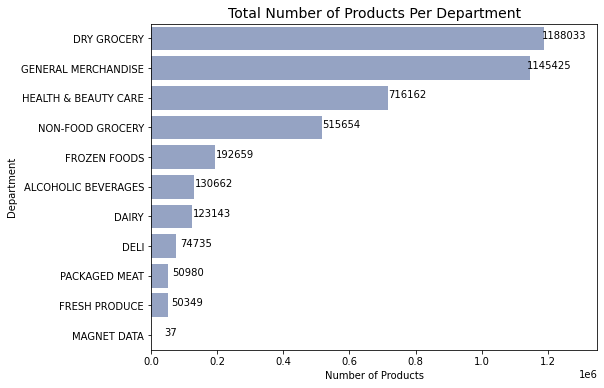

In [145]:
base_color = sns.color_palette("Set2")[2]

fig, ax =plt.subplots(figsize=(8,6))
sns.barplot(x='total_prod_per_department', y='department', data=prod_per_dpt, color=base_color);

# set title, x and y labels
plt.title('Total Number of Products Per Department', fontsize=14)
plt.ylabel('Department')
plt.xlabel('Number of Products')
plt.xlim(0, 1.35e6)
# Annotate Text
for a, b in enumerate(prod_per_dpt.index):
    plt.text(prod_per_dpt['total_prod_per_department'][b]+60000, a, prod_per_dpt['total_prod_per_department'][b], ha='center')
plt.show()


### Total Number of Modules Per Department

In [90]:
## getting data of total number of products per department from mysql database with sql qurey
sql_query = "SELECT department_at_prod_id AS department, COUNT(DISTINCT module_at_prod_id) AS total_module_per_department FROM dta_at_prod_id WHERE department_at_prod_id IS NOT NULL GROUP BY department_at_prod_id ORDER BY total_module_per_department DESC;"

module_per_dpt = pd.read_sql(sql_query, con = my_db)
module_per_dpt.head()

,department,total_module_per_department
0,DRY GROCERY,445
1,GENERAL MERCHANDISE,194
2,HEALTH & BEAUTY CARE,180
3,NON-FOOD GROCERY,141
4,FROZEN FOODS,90


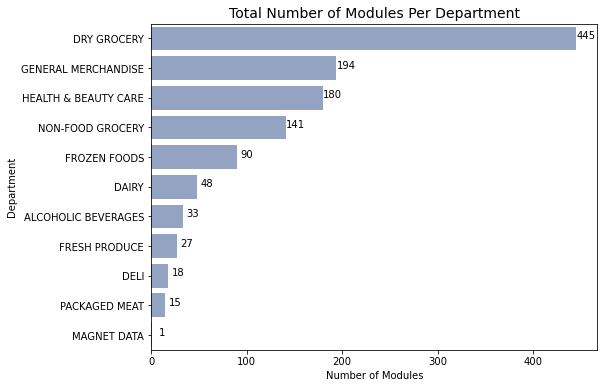

In [146]:
fig, ax =plt.subplots(figsize=(8,6))
sns.barplot(x='total_module_per_department', y='department', data=module_per_dpt, color=base_color);

# set title, x and y labels
plt.title('Total Number of Modules Per Department', fontsize=14)
plt.ylabel('Department')
plt.xlabel('Number of Modules')
# Annotate Text
for a, b in enumerate(module_per_dpt.index):
    plt.text(module_per_dpt['total_module_per_department'][b]+10, a, module_per_dpt['total_module_per_department'][b], ha='center')
plt.show()

## b.2.i Plot the Percentage of Race of Loyal Households

In [147]:
# Race
# import datasets for loyal households
single_retailer = pd.read_csv('../Results/single_retailer.csv')
two_retailer = pd.read_csv('../Results/two_retailer.csv')

In [129]:
# prepare data
# count the number of race for two types of loyal customers
count_race_single = single_retailer.groupby("hh_race",as_index = False)["hh_race"].agg({"counts": "count"})
count_race_two = two_retailer.groupby("hh_race",as_index = False)["hh_race"].agg({"counts": "count"})
# merge the two types of loyal customers
count_race = count_race_single.merge(count_race_two, on='hh_race').sort_values('counts_x', ascending=False)
# name the race
count_race['race'] = ['White Caucasian','African American','Asian','Others']
# count the percentage of the two types of loyal customers
count_race['single_percentage'] = count_race['counts_x'] / count_race['counts_x'].sum()
count_race['two_percentage'] = count_race['counts_y'] / count_race['counts_y'].sum()

# create a dataframe for the percentage
pct_race = count_race[['race', 'single_percentage', 'two_percentage']]
pct_race = pct_race.melt(id_vars='race', var_name = 'loyal_type', value_name='percentage')
pct_race.head()

,race,loyal_type,percentage
0,White Caucasian,single_percentage,0.914894
1,African American,single_percentage,0.053191
2,Asian,single_percentage,0.021277
3,Others,single_percentage,0.010638
4,White Caucasian,two_percentage,0.918699


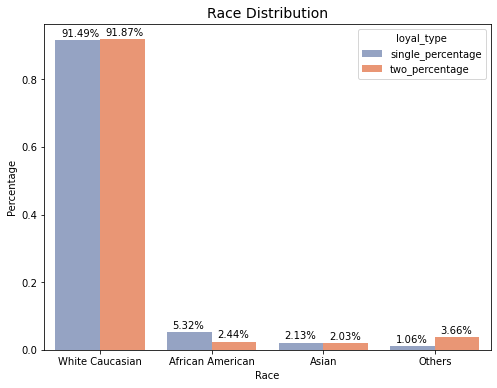

In [244]:
# set the color
colors = [sns.color_palette('Set2')[2],sns.color_palette('Set2')[1]]
# plot the barplot for percentage of race of different loyal types
fig, ax =plt.subplots(figsize=(8,6))
g = sns.barplot(x='race', y='percentage', hue='loyal_type', data=pct_race, palette=colors);

plt.ylabel('Percentage')
plt.xlabel('Race')
plt.title('Race Distribution', fontsize=14)

# Annotate Text
for a, b in enumerate(pct_race.index[:4]):
    plt.text(a-0.35, pct_race['percentage'][b]+0.02, f'{round((pct_race["percentage"][b])*100, 2)}%', va='center')
for a, b in enumerate(pct_race.index[4:]):
    plt.text(a+0.05, pct_race['percentage'][b]+0.02, f'{round((pct_race["percentage"][b])*100, 2)}%', va='center')

Both two kinds of households are mainly White Caucasian, having a portion of over 90%, and the portion of Asian households is almost the same. The main difference between households loyal to single retailer and those loyal to two retailers is that the latter have a larger portion of African American, which is 3.7% while 1.1% for the former.

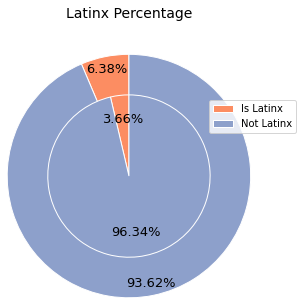

In [248]:
# Is Latinx
# Prepare data
count_islatinx_single = single_retailer.groupby("hh_is_latinx",as_index = False)["hh_is_latinx"].agg({"counts": "count"})
count_islatinx_two = two_retailer.groupby("hh_is_latinx",as_index = False)["hh_is_latinx"].agg({"counts": "count"})

# Draw Pie Chart
fig, ax = plt.subplots(ncols=2, figsize=(4,3))
ax1, ax2 = ax.ravel()

colors = [sns.color_palette('Set2')[1],sns.color_palette('Set2')[2]]
labels = ['Is Latinx','Not Latinx']

pie_1 = ax1.pie(count_islatinx_single['counts'], textprops = {'fontsize':13, 'color':'k'},startangle=90,autopct='%1.2f%%',radius=3,pctdistance = 0.9,colors=colors)
pie_2 = ax1.pie(count_islatinx_two['counts'], textprops = {'fontsize':13, 'color':'k'},startangle=90,autopct='%1.2f%%',radius=2,pctdistance = 0.7,colors=colors)
# Set wedge line between two pies
for pie_wedge in pie_1[0]:
    pie_wedge.set_edgecolor('white')
for pie_wedge in pie_2[0]:
    pie_wedge.set_edgecolor('white')
# Title, Label, Ticks  
ax1.set(aspect="equal")
ax1.set_title('Latinx Percentage', fontsize=14, y=2)
# ax2 only shows legend
ax2.axis('off')
ax2.legend(pie_1[0],labels,fontsize=10)

plt.show()

We also consider whether latinx household is related to loyalism. The pie chart shows the difference. Among households loyal to single retailer, latinx has a larger portion (6.4%), compared with those loyal to two retailers (3.7%).

## b.2.i. Plot the Households Size

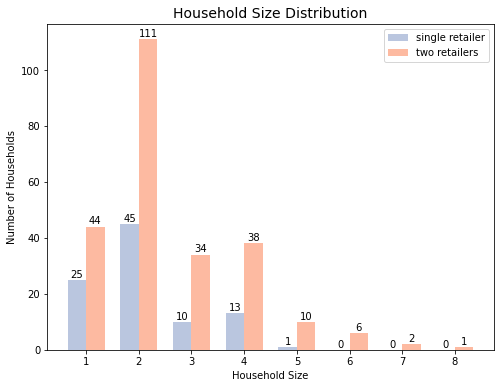

In [255]:
## Household Size

# Prepare data
count_hhsize_single = single_retailer.groupby("hh_size",as_index = False)["hh_size"].agg({"counts": "count"})
count_hhsize_two = two_retailer.groupby("hh_size",as_index = False)["hh_size"].agg({"counts": "count"})

merge = pd.merge(count_hhsize_single, count_hhsize_two, how='right', on = 'hh_size')
for i in merge.index:
    if math.isnan(merge['counts_x'][i]):
        merge['counts_x'][i] = 0  
merge.columns = ['hh_size','count_for_single','count_for_two']

name_list = list(merge['hh_size'])
merge['count_for_single'] = merge['count_for_single'].astype(int)
num_list1 = list(merge['count_for_single'])
num_list2 = list(merge['count_for_two'])

x =np.arange(len(num_list1))
total_width, n = 0.7, 2
width = total_width / n
# Drawing plot
plt.subplots(figsize=(8,6), facecolor='white')
plt.bar(x, num_list1, width=width, label='single retailer',fc = sns.color_palette("Set2")[2],alpha=0.6)
plt.bar(x+width, num_list2, width=width, label='two retailers',fc = sns.color_palette("Set2")[1],alpha=0.6)
# Title, Label, Ticks  
plt.title('Household Size Distribution',fontsize=14)
plt.xlabel('Household Size')
plt.ylabel('Number of Households')
plt.xticks(x+width/2, name_list)
plt.legend()
for a, b in enumerate(merge.index):
    plt.text(a, merge['count_for_single'][b]+1, merge['count_for_single'][b], ha='center')
    plt.text(a+0.35, merge['count_for_two'][b]+1, merge['count_for_two'][b], ha='center')

plt.show()

When analyzing household demographics, firstly, we focus on the household size, namely, the number of family members. The bar chart shows similar household size distribution.     

For both kinds of households loyal to single retailer and those loyal to two retailers, the small families, with no more than 5 members, account for the majority. Households with only one or two people weighs more than 50%, and they are more likely to be loyal to single retailer than two retailers. These phenomena all indicate that small families have higher brand loyalty, probably because tastes are more various when family member increasing.

## b.2.i. Plot the Income Distribution

In [257]:
# import data for household information
dta_at_hh = pd.read_csv('../Results/dta_at_hh.csv')

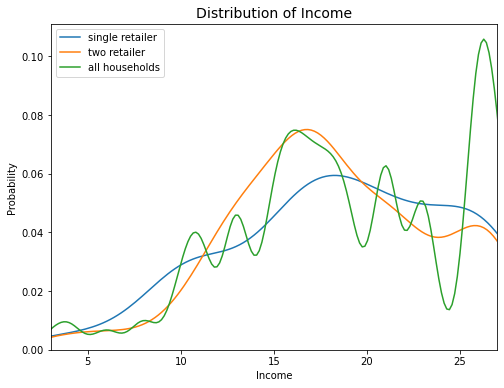

In [274]:
# Are these people richer? Poorer?

# Drawing plot
f, ax= plt.subplots(figsize = (8, 6))
ax = sns.kdeplot(single_retailer['hh_income'], cut=3,label='single retailer')
sns.kdeplot(two_retailer['hh_income'], cut=3,label='two retailer')
sns.kdeplot(dta_at_hh['hh_income'], cut=3,label='all households')
# Title, Label, Ticks  
ax.set_title('Distribution of Income',fontsize=14)
ax.set_xlabel('Income')
ax.set(xlim=(3,27))
ax.set_ylabel('Probability')
ax.legend(loc='upper left')
plt.show()

According to the kernel distribution of household income, we can find that households loyal to single retailer have a larger probability to have lower income, and those loyal to two retailers are more likely to have a medium income level.    

When the household income is higher than \$18,000 a year, the probability to be loyal goes down. And we can see remarkable gap in probability between the overall and those with loyalty over the income of $25,000. These all indicate that loyal households tend to have lower income; namely, they are poorer.

## b.2.iii. Plot the distribution by state 

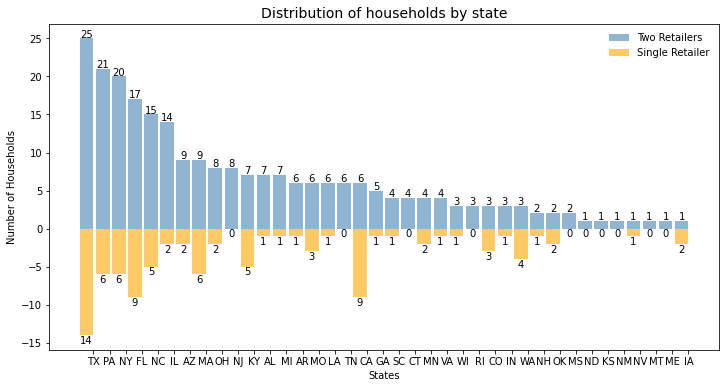

In [282]:
# Prepare data
states_n = Counter(single_retailer['hh_state'])
states_count = pd.DataFrame.from_dict(states_n, orient='index').reset_index()
states_count.columns = ['state','count']
states_count.sort_values('count', ascending = False, inplace = True)

# Prepare data
states_n_2 = Counter(two_retailer['hh_state'])
states_count_2 = pd.DataFrame.from_dict(states_n_2, orient='index').reset_index()
states_count_2.columns = ['state','count']
states_count_2.sort_values('count', ascending = False, inplace = True)

merge = pd.merge(states_count_2, states_count, how='left', on = 'state')
for i in merge.index:
    if math.isnan(merge['count_y'][i]):
        merge['count_y'][i] = 0
        

# Drawing plot
x = np.arange(38)
width = 0.85
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x, merge['count_x'],
         linewidth = 1, color = 'steelblue', alpha = 0.6,
       label = 'Two Retailers', width = width)
ax.bar(x, -merge['count_y'], 
       linewidth = 1, color = 'orange', alpha = 0.6,
       label = 'Single Retailer', width = width)
# Title, Label, Ticks and Ylim
plt.title('Distribution of households by state', fontsize=14)
ax.set_ylabel('Number of Households')
ax.set_xlabel('States')
#ax.set(ylim=(0,30))
plt.xticks(x+width/2, merge['state'])

# Annotate Text
for a, b in enumerate(merge.index):
    ax.text(a, merge['count_x'][b]+0.2, merge['count_x'][b], horizontalalignment='center')
    ax.text(a, -merge['count_y'][b]-1.1, int(merge['count_y'][b]), horizontalalignment='center')
    
plt.legend(framealpha = 0)
plt.show()

As for loyalism, we think conclusions cannot be drawn that people from TX, FL, PA, NY are more loyal to the retailers they shop from.

1. The y-axis of the graph shows the number of household rather than the percentage, comparing the absolute value cannot yield valid inference about loyalism of people from different states because we didn’t take the customer base in different areas in to account.

2. The data doesn’t take the available number of retailers in different states into account.

We cannot say the households are loyal to one or two retailers when those retailers are the only choices for them.

## b.3.i Average number of items purchased on a given month.

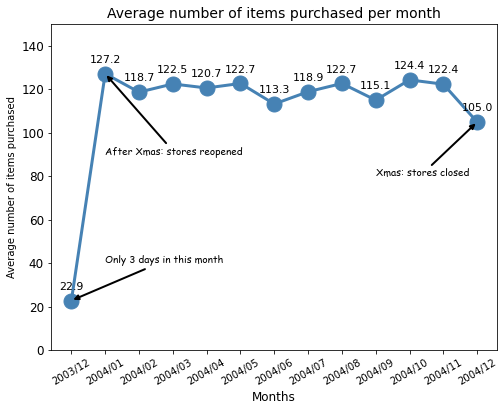

In [291]:
avg_items = pd.read_csv('../Results/b3_i.csv', dtype = {'monthly' : str})
avg_items.sort_values(by = "monthly", inplace = True)
for index in list(avg_items.index):
    str_1=avg_items['monthly'][index]
    str_list=list(str_1)
    str_list.insert(4,'/')
    avg_items['monthly'][index]="".join(str_list)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(avg_items["monthly"], avg_items["avg_items"],
        marker = 'o', markersize = 15, linewidth=3, color = 'steelblue')
    
# Title, Label, Ticks 
ax.set_title('Average number of items purchased per month', fontdict={'size':14})
ax.set_xlabel("Months", fontsize=12)
ax.set_ylabel("Average number of items purchased")
ax.set_xticklabels(avg_items["monthly"])
ax.set(ylim=(0,150))
plt.yticks(fontsize=12)
plt.xticks(rotation=30)


# Annotate Text
for a, b in enumerate(avg_items.index):
    ax.text(a, avg_items['avg_items'][b]+5, round(avg_items['avg_items'][b],1), horizontalalignment='center', fontsize =11)
    
ax.annotate("Only 3 days in this month", fontsize = 10, fontname = font,
                xy = ('2003/12', 22.9), 
                xytext = ('2004/01', 40), 
                arrowprops = {"arrowstyle":"-|>",'color':'black', 'linewidth':2})
ax.annotate("Xmas: stores closed", fontsize = 10, fontname = font,
                xy = ('2004/12', 105), 
                xytext = ('2004/09', 80), 
                arrowprops = {"arrowstyle":"-|>",'color':'black', 'linewidth':2})
ax.annotate("After Xmas: stores reopened", fontsize = 10, fontname = font,
                xy = ('2004/01', 127.2), 
                xytext = ('2004/01', 90), 
                arrowprops = {"arrowstyle":"-|>",'color':'black', 'linewidth':2})
plt.show()

We can see the value is the lowest in Dec. 2003, it does not mean people purchase less in this month, and we believe this is due to the data we have only includes 3 days of Dec. 2003, that is, the value (22.9) is not a valid value for average number of items purchased per month in this case.   

Removing the value of Dec.2003, we can see the item purchasing level keeps fluctuate a little bit every month throughout the year 2004, there are 2 significate points: 127.2 at Jan. 2004 and Dec. 2004.    

In explaining this, we believe the purchasing increase in Jan. 2004 is due to stores closed during Christmas reopened, thus the stores available for customers increased and this may contribute to this growth; likewise, the decreasing purchasing level in Dec. 2004 is due to the fewer available stores for customers because of Christmas.

## b.3.ii Average number of shopping trips per month.

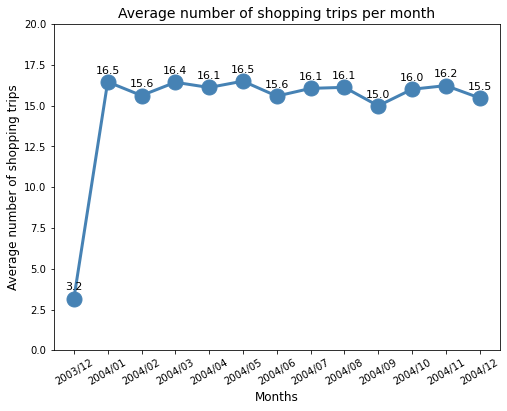

In [300]:
avg_trips = pd.read_csv("../Results/b3_ii.csv", dtype = {'monthly' : str})
avg_trips.sort_values(by = "monthly", inplace = True)

# plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(avg_trips["monthly"], avg_trips["avg_trips"],marker = 'o', markersize = 15, 
        linewidth = 3, color = 'steelblue')

# Title, Label, Ticks 
ax.set_title('Average number of shopping trips per month', fontdict={'size':14})
ax.set_xlabel("Months", fontsize = 12)
ax.set_ylabel("Average number of shopping trips", fontsize = 12)
ax.set_xticklabels(avg_items["monthly"])
ax.set(ylim=(0,20))
plt.xticks(rotation=30)

for a, b in enumerate(avg_trips.index):
    ax.text(a, avg_trips['avg_trips'][b]+0.5, round(avg_trips['avg_trips'][b],1), horizontalalignment='center', fontsize =11)

plt.show()

Removing the value of Dec.2003, we can see the number of average monthly shopping trips keeps fluctuate a little bit every month throughout the year 2004.

## b.3.iii Average number of days between 2 consecutive shopping trips.

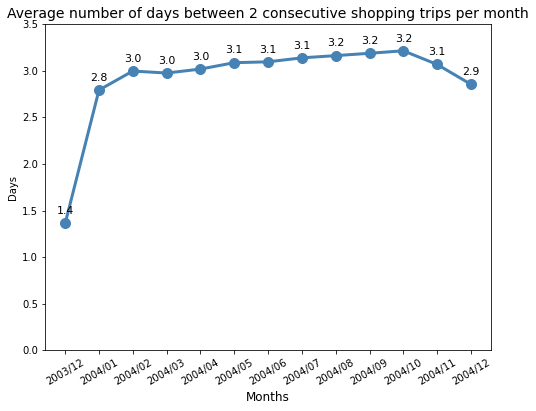

In [301]:
avg_gap = pd.read_csv("../Results/b3_iii.csv", dtype = {'monthly' : str})
avg_gap.sort_values(by = "monthly", inplace = True)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(avg_gap["monthly"], avg_gap["avg_gap"], marker = 'o', markersize = 10, 
        linewidth = 3, color = 'steelblue')

# Title, Label, Ticks 
ax.set_title('Average number of days between 2 consecutive shopping trips per month', fontdict={'size':14})
ax.set_xlabel("Months", fontsize = 12)
ax.set_ylabel("Days")
ax.set_xticklabels(avg_items["monthly"])
ax.set(ylim=(0,3.5))
plt.xticks(rotation=30)

for a, b in enumerate(avg_gap.index):
    ax.text(a, avg_gap['avg_gap'][b]+0.1, round(avg_gap['avg_gap'][b],1), horizontalalignment='center', fontsize =11)
plt.show()

Removing the value of Dec.2003, we can see the number of average number of days between 2 consecutive shopping trips keeps fluctuate a little bit every month throughout the year 2004.

## C.3.i  What are the product categories that have proven to be more “Private labelled”?

In [312]:
## connecting mysql
sql_query = "SELECT department_at_prod_id AS category, COUNT(brand_at_prod_id) AS num_private_category FROM dta_at_prod_id WHERE brand_at_prod_id REGEXP '(CTL BR)' GROUP BY department_at_prod_id ORDER BY num_private_category DESC;"

private_labeled = pd.read_sql(sql_query, con=my_db)
## rename colunmns
private_labeled.columns =['category', 'number']
## rest index
private_labeled.reset_index(inplace=True)
private_labeled.iloc[9,1] = 'OTHERS'
private_labeled

,index,category,number
0,0,DRY GROCERY,421425
1,1,HEALTH & BEAUTY CARE,178532
2,2,NON-FOOD GROCERY,169298
3,3,GENERAL MERCHANDISE,154744
4,4,FROZEN FOODS,79701
5,5,DAIRY,47133
6,6,DELI,35173
7,7,PACKAGED MEAT,15851
8,8,FRESH PRODUCE,10250
9,9,OTHERS,3623


### Draw the plot of 'total number of private labeled items per department'

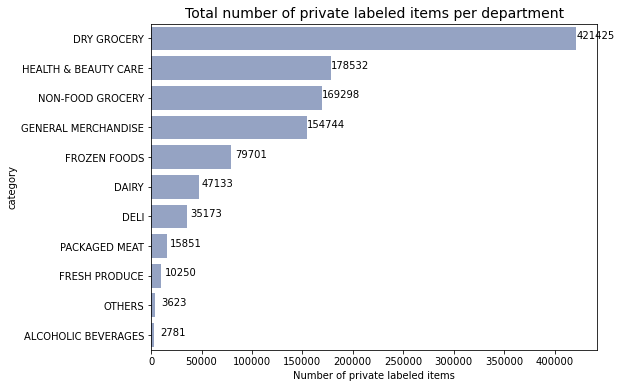

In [321]:
base_color = sns.color_palette("Set2")[2]

fig, ax =plt.subplots(figsize=(8,6))
sns.barplot(x='number', y='category', data=private_labeled, color=base_color);

# set title, x and y labels
plt.title('Total number of private labeled items per department', fontsize=14)
plt.xlabel('Number of private labeled items')

# Annotate Text
for a, b in enumerate(private_labeled.index):
    ax.text(private_labeled['number'][b]+19000, a, private_labeled['number'][b], horizontalalignment='center', fontsize = 10)
plt.show()


As shown in the graph above, we can see among all the categories of products, the greatest number belongs to ‘Dry grocery’, followed by ‘Health & beauty care’, ‘Non-food grocery’ and ‘General merchandise’, so these four categories, especially ‘Dry grocery’ has proven to be more private labelled.

## C.3.ii  Is the expenditure share in Private Labeled products constant across months?

In [322]:
## connecting mysql
sql_query = "WITH t1 AS (select monthly, SUM(total_price_paid_at_TC_prod_id) AS total_monthly_spend FROM private_labeled GROUP BY monthly),t2 AS (SELECT monthly, SUM(total_price_paid_at_TC_prod_id) AS total_monthly_labeled_spend FROM private_labeled WHERE brand_at_prod_id REGEXP '(CTL BR)' GROUP BY monthly) SELECT monthly, total_monthly_labeled_spend/total_monthly_spend AS ratio_labeled FROM t1 INNER JOIN t2 USING(monthly) ORDER BY monthly;"

monthly_ratio_labeled = pd.read_sql(sql_query, con=my_db)
## rename colunmns
monthly_ratio_labeled.columns =['month', 'monthly_ratio_labeled']
## rest index
monthly_ratio_labeled.set_index(['month'])
monthly_ratio_labeled.head()

,month,monthly_ratio_labeled
0,1,0.158001
1,2,0.158612
2,3,0.156474
3,4,0.156678
4,5,0.156888


### Draw the plot of 'Expenditure share in Private Labeled products'

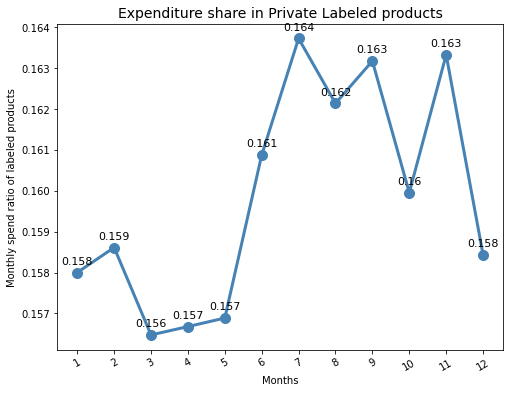

In [323]:
x = np.arange(12)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, monthly_ratio_labeled['monthly_ratio_labeled'],
        marker = 'o', markersize = 10, linewidth=3, color = 'steelblue')

# Title, Label, Ticks and Ylim
ax.set_title('Expenditure share in Private Labeled products', fontdict={'size':14})
plt.xticks(x, monthly_ratio_labeled['month'])
ax.set_xlabel("Months")
ax.set_ylabel('Monthly spend ratio of labeled products')
plt.xticks(rotation=30)

# Annotate Text
for a, b in enumerate(monthly_ratio_labeled.index):
    ax.text(a, monthly_ratio_labeled['monthly_ratio_labeled'][b]+0.0002, round(monthly_ratio_labeled['monthly_ratio_labeled'][b],3), 
            horizontalalignment='center', fontsize =11)
plt.show()

According to the graph Monthly expenditure share in Private Labeled products, we can easily see that it is not constant across months; rather, there is significant fluctuation among the months.     

The monthly expenditure share in Private Labeled products keeps lower than 16%(0.160) from January to May 2004, then it boomed to 16.1% in June, keeps high around 16.3% from July to September, drops at October, and increases again at November, and then decreases at December.    

In explaining this, we believe that every year from December to May next year, people only shop private labeled products when they need them; but as summer approaching at June, it’s getting warm outside and households would go out to go on small trips or have picnics more and buy something eatable and easy to take out with (products belong to ‘Dry grocery’). And as weather gets colder, people tend to shop less these products thus the share of private labeled drops; but November is an exclusion, we infer that maybe